In [1]:
import allel
import numpy as np
import pandas as pd
from functools import reduce
import pprint

In [2]:
# Core
import numpy as np
import pandas as pd
from time import time
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# ML
import xgboost as xgb
from xgboost import XGBClassifier, DMatrix
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from skopt import BayesSearchCV
from skopt.space import Real, Integer

In [8]:
df = pd.read_csv('combined_dataset.csv')
df = df.iloc[:,1:]

In [10]:
for col in df.columns:
    if df[col].dtype == 'O':
        df[col] = df[col].astype('category')

In [11]:
# didnt needed this when i optimise, idk why now it keeps giving error
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df[['STATUS_vd']] = enc.fit_transform(df[['STATUS_vd']])

In [13]:
X = df.drop(['truth', 'POS', 'CHROM'], axis=1).values
y = df.truth.values
# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 1)
eval_set = [(X_train, y_train), (X_val, y_val)]

In [34]:
df.columns

Index(['SOMATIC_fb', 'QUAL_fb', 'QR_fb', 'DPB_fb', 'CHROM', 'POS',
       'ID_binary_fb', 'FILTER_PASS_m2', 'ECNT_m2', 'MQ_m2',
       'FILTER_t_lod_fstar_m2', 'HCNT_m2', 'DP_m2', 'ID_binary_m2',
       'FILTER_PASS_vd', 'STATUS_vd', 'SSF_vd', 'VD_vd', 'SOMATIC_vd',
       'ID_binary_vd', 'SOMATIC_vs', 'SPV_vs', 'FILTER_PASS_vs',
       'ID_binary_vs', 'truth'],
      dtype='object')

In [36]:
# load optimizer
from skopt import load
bayes_cv = load('optimise2.pkl')

In [37]:
bayes_cv.best_params_

OrderedDict([('gamma', 9.097521745870962e-08),
             ('learning_rate', 0.7875658649006444),
             ('max_depth', 3),
             ('n_estimators', 3337),
             ('reg_alpha', 0.032375745816368075),
             ('reg_lambda', 0.31035547140858155)])

In [38]:
bayes_cv.best_score_, bayes_cv.n_iter

(0.9497106642455903, 100)

In [39]:
xgb_clf_tuned2 = XGBClassifier(
        objective = 'binary:logistic',
        enable_categorical = True,
        tree_method='approx',
        early_stopping_rounds = 30,
        **bayes_cv.best_params_
)

In [41]:
xgb_clf_tuned2.fit(X_train, y_train, eval_set = eval_set, verbose = True)

[0]	validation_0-logloss:0.18876	validation_1-logloss:0.18877
[1]	validation_0-logloss:0.07778	validation_1-logloss:0.07777
[2]	validation_0-logloss:0.03454	validation_1-logloss:0.03453
[3]	validation_0-logloss:0.01607	validation_1-logloss:0.01606
[4]	validation_0-logloss:0.00791	validation_1-logloss:0.00792
[5]	validation_0-logloss:0.00427	validation_1-logloss:0.00428
[6]	validation_0-logloss:0.00262	validation_1-logloss:0.00265
[7]	validation_0-logloss:0.00185	validation_1-logloss:0.00187
[8]	validation_0-logloss:0.00148	validation_1-logloss:0.00151
[9]	validation_0-logloss:0.00129	validation_1-logloss:0.00130
[10]	validation_0-logloss:0.00118	validation_1-logloss:0.00120
[11]	validation_0-logloss:0.00112	validation_1-logloss:0.00114
[12]	validation_0-logloss:0.00108	validation_1-logloss:0.00111
[13]	validation_0-logloss:0.00102	validation_1-logloss:0.00104
[14]	validation_0-logloss:0.00092	validation_1-logloss:0.00096
[15]	validation_0-logloss:0.00087	validation_1-logloss:0.00090
[1

[130]	validation_0-logloss:0.00040	validation_1-logloss:0.00066
[131]	validation_0-logloss:0.00040	validation_1-logloss:0.00066
[132]	validation_0-logloss:0.00040	validation_1-logloss:0.00066
[133]	validation_0-logloss:0.00040	validation_1-logloss:0.00066
[134]	validation_0-logloss:0.00040	validation_1-logloss:0.00066
[135]	validation_0-logloss:0.00039	validation_1-logloss:0.00066
[136]	validation_0-logloss:0.00039	validation_1-logloss:0.00066
[137]	validation_0-logloss:0.00039	validation_1-logloss:0.00066
[138]	validation_0-logloss:0.00039	validation_1-logloss:0.00066
[139]	validation_0-logloss:0.00039	validation_1-logloss:0.00066
[140]	validation_0-logloss:0.00039	validation_1-logloss:0.00066
[141]	validation_0-logloss:0.00039	validation_1-logloss:0.00066
[142]	validation_0-logloss:0.00039	validation_1-logloss:0.00066
[143]	validation_0-logloss:0.00039	validation_1-logloss:0.00066
[144]	validation_0-logloss:0.00039	validation_1-logloss:0.00066
[145]	validation_0-logloss:0.00038	valid

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=30,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=9.097521745870962e-08, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.7875658649006444, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=3337, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [42]:
# save model
xgb_clf_tuned2.save_model('tuned2.model')

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

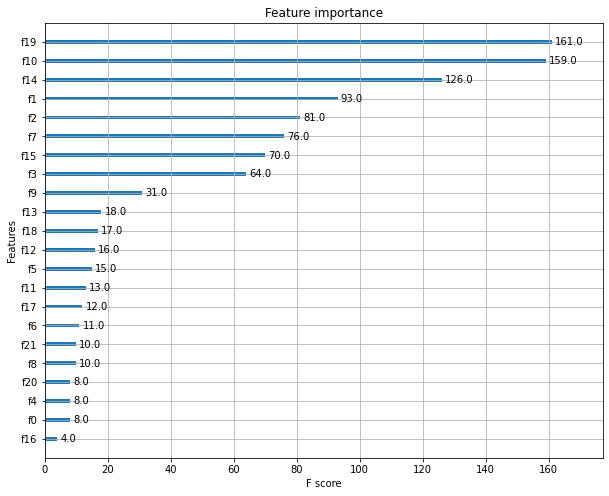

In [43]:
fig, ax = plt.subplots(figsize = (10, 8))
xgb.plot_importance(xgb_clf_tuned2, ax=ax)

In [44]:
# Predict on test set using fitted model
y_pred = xgb_clf_tuned2.predict(X_test)

In [45]:
from sklearn import metrics
stats = [metrics.precision_score, metrics.recall_score, metrics.f1_score]
[g(y_test, y_pred) for g in stats]

[0.9696280656163716, 0.9391222274657858, 0.9541313728623941]

### Optimiser 1 

In [3]:
# load optimizer
from skopt import load
bayes_cv = load('optimise1.pkl')

In [4]:
bayes_cv.best_params_

OrderedDict([('colsample_bytree', 0.7144725275959898),
             ('gamma', 0.31035547140858155),
             ('learning_rate', 0.013273485724617099),
             ('max_depth', 20),
             ('n_estimators', 2292),
             ('reg_alpha', 1.1209277129026352e-09),
             ('reg_lambda', 1.9653834635042706),
             ('subsample', 0.7383254542060781)])

In [5]:
bayes_cv.best_score_, bayes_cv.n_iter

(0.956519520243514, 100)

In [6]:
from skopt.plots import plot_evaluations, plot_objective, plot_convergence

In [14]:
xgb_clf_tuned = XGBClassifier(
        objective = 'binary:logistic', 
        enable_categorical = True,
        tree_method='approx',
        early_stopping_rounds = 50,
        **bayes_cv.best_params_
)

In [15]:
xgb_clf_tuned.fit(X_train, y_train, eval_set = eval_set, verbose = True)

[0]	validation_0-logloss:0.67998	validation_1-logloss:0.67998
[1]	validation_0-logloss:0.66715	validation_1-logloss:0.66715
[2]	validation_0-logloss:0.65465	validation_1-logloss:0.65465
[3]	validation_0-logloss:0.64248	validation_1-logloss:0.64248
[4]	validation_0-logloss:0.63061	validation_1-logloss:0.63061
[5]	validation_0-logloss:0.61903	validation_1-logloss:0.61904
[6]	validation_0-logloss:0.60774	validation_1-logloss:0.60775
[7]	validation_0-logloss:0.59673	validation_1-logloss:0.59673
[8]	validation_0-logloss:0.58598	validation_1-logloss:0.58598
[9]	validation_0-logloss:0.57549	validation_1-logloss:0.57549
[10]	validation_0-logloss:0.56524	validation_1-logloss:0.56525
[11]	validation_0-logloss:0.55524	validation_1-logloss:0.55524
[12]	validation_0-logloss:0.54546	validation_1-logloss:0.54547
[13]	validation_0-logloss:0.53591	validation_1-logloss:0.53591
[14]	validation_0-logloss:0.52657	validation_1-logloss:0.52658
[15]	validation_0-logloss:0.51744	validation_1-logloss:0.51745
[1

[130]	validation_0-logloss:0.09211	validation_1-logloss:0.09216
[131]	validation_0-logloss:0.09085	validation_1-logloss:0.09089
[132]	validation_0-logloss:0.08960	validation_1-logloss:0.08964
[133]	validation_0-logloss:0.08837	validation_1-logloss:0.08841
[134]	validation_0-logloss:0.08716	validation_1-logloss:0.08721
[135]	validation_0-logloss:0.08597	validation_1-logloss:0.08601
[136]	validation_0-logloss:0.08479	validation_1-logloss:0.08483
[137]	validation_0-logloss:0.08363	validation_1-logloss:0.08367
[138]	validation_0-logloss:0.08248	validation_1-logloss:0.08253
[139]	validation_0-logloss:0.08136	validation_1-logloss:0.08140
[140]	validation_0-logloss:0.08024	validation_1-logloss:0.08029
[141]	validation_0-logloss:0.07915	validation_1-logloss:0.07919
[142]	validation_0-logloss:0.07807	validation_1-logloss:0.07812
[143]	validation_0-logloss:0.07701	validation_1-logloss:0.07706
[144]	validation_0-logloss:0.07596	validation_1-logloss:0.07601
[145]	validation_0-logloss:0.07492	valid

[259]	validation_0-logloss:0.01638	validation_1-logloss:0.01647
[260]	validation_0-logloss:0.01617	validation_1-logloss:0.01626
[261]	validation_0-logloss:0.01596	validation_1-logloss:0.01605
[262]	validation_0-logloss:0.01575	validation_1-logloss:0.01585
[263]	validation_0-logloss:0.01555	validation_1-logloss:0.01564
[264]	validation_0-logloss:0.01535	validation_1-logloss:0.01544
[265]	validation_0-logloss:0.01515	validation_1-logloss:0.01525
[266]	validation_0-logloss:0.01496	validation_1-logloss:0.01505
[267]	validation_0-logloss:0.01476	validation_1-logloss:0.01486
[268]	validation_0-logloss:0.01457	validation_1-logloss:0.01467
[269]	validation_0-logloss:0.01439	validation_1-logloss:0.01448
[270]	validation_0-logloss:0.01420	validation_1-logloss:0.01430
[271]	validation_0-logloss:0.01402	validation_1-logloss:0.01412
[272]	validation_0-logloss:0.01384	validation_1-logloss:0.01394
[273]	validation_0-logloss:0.01366	validation_1-logloss:0.01376
[274]	validation_0-logloss:0.01349	valid

[388]	validation_0-logloss:0.00329	validation_1-logloss:0.00343
[389]	validation_0-logloss:0.00325	validation_1-logloss:0.00339
[390]	validation_0-logloss:0.00322	validation_1-logloss:0.00336
[391]	validation_0-logloss:0.00318	validation_1-logloss:0.00332
[392]	validation_0-logloss:0.00314	validation_1-logloss:0.00328
[393]	validation_0-logloss:0.00311	validation_1-logloss:0.00325
[394]	validation_0-logloss:0.00307	validation_1-logloss:0.00321
[395]	validation_0-logloss:0.00304	validation_1-logloss:0.00318
[396]	validation_0-logloss:0.00300	validation_1-logloss:0.00314
[397]	validation_0-logloss:0.00297	validation_1-logloss:0.00311
[398]	validation_0-logloss:0.00293	validation_1-logloss:0.00308
[399]	validation_0-logloss:0.00290	validation_1-logloss:0.00304
[400]	validation_0-logloss:0.00287	validation_1-logloss:0.00301
[401]	validation_0-logloss:0.00283	validation_1-logloss:0.00298
[402]	validation_0-logloss:0.00280	validation_1-logloss:0.00295
[403]	validation_0-logloss:0.00277	valid

[517]	validation_0-logloss:0.00091	validation_1-logloss:0.00110
[518]	validation_0-logloss:0.00090	validation_1-logloss:0.00109
[519]	validation_0-logloss:0.00090	validation_1-logloss:0.00108
[520]	validation_0-logloss:0.00089	validation_1-logloss:0.00108
[521]	validation_0-logloss:0.00088	validation_1-logloss:0.00107
[522]	validation_0-logloss:0.00088	validation_1-logloss:0.00106
[523]	validation_0-logloss:0.00087	validation_1-logloss:0.00106
[524]	validation_0-logloss:0.00086	validation_1-logloss:0.00105
[525]	validation_0-logloss:0.00086	validation_1-logloss:0.00104
[526]	validation_0-logloss:0.00085	validation_1-logloss:0.00104
[527]	validation_0-logloss:0.00084	validation_1-logloss:0.00103
[528]	validation_0-logloss:0.00084	validation_1-logloss:0.00103
[529]	validation_0-logloss:0.00083	validation_1-logloss:0.00102
[530]	validation_0-logloss:0.00083	validation_1-logloss:0.00101
[531]	validation_0-logloss:0.00082	validation_1-logloss:0.00101
[532]	validation_0-logloss:0.00081	valid

[646]	validation_0-logloss:0.00046	validation_1-logloss:0.00067
[647]	validation_0-logloss:0.00045	validation_1-logloss:0.00067
[648]	validation_0-logloss:0.00045	validation_1-logloss:0.00067
[649]	validation_0-logloss:0.00045	validation_1-logloss:0.00067
[650]	validation_0-logloss:0.00045	validation_1-logloss:0.00067
[651]	validation_0-logloss:0.00045	validation_1-logloss:0.00067
[652]	validation_0-logloss:0.00045	validation_1-logloss:0.00067
[653]	validation_0-logloss:0.00045	validation_1-logloss:0.00066
[654]	validation_0-logloss:0.00044	validation_1-logloss:0.00066
[655]	validation_0-logloss:0.00044	validation_1-logloss:0.00066
[656]	validation_0-logloss:0.00044	validation_1-logloss:0.00066
[657]	validation_0-logloss:0.00044	validation_1-logloss:0.00066
[658]	validation_0-logloss:0.00044	validation_1-logloss:0.00066
[659]	validation_0-logloss:0.00044	validation_1-logloss:0.00066
[660]	validation_0-logloss:0.00044	validation_1-logloss:0.00066
[661]	validation_0-logloss:0.00044	valid

[775]	validation_0-logloss:0.00035	validation_1-logloss:0.00060
[776]	validation_0-logloss:0.00035	validation_1-logloss:0.00060
[777]	validation_0-logloss:0.00035	validation_1-logloss:0.00060
[778]	validation_0-logloss:0.00035	validation_1-logloss:0.00060
[779]	validation_0-logloss:0.00035	validation_1-logloss:0.00059
[780]	validation_0-logloss:0.00035	validation_1-logloss:0.00059
[781]	validation_0-logloss:0.00035	validation_1-logloss:0.00059
[782]	validation_0-logloss:0.00035	validation_1-logloss:0.00059
[783]	validation_0-logloss:0.00035	validation_1-logloss:0.00059
[784]	validation_0-logloss:0.00035	validation_1-logloss:0.00059
[785]	validation_0-logloss:0.00035	validation_1-logloss:0.00059
[786]	validation_0-logloss:0.00035	validation_1-logloss:0.00059
[787]	validation_0-logloss:0.00035	validation_1-logloss:0.00059
[788]	validation_0-logloss:0.00035	validation_1-logloss:0.00059
[789]	validation_0-logloss:0.00035	validation_1-logloss:0.00059
[790]	validation_0-logloss:0.00035	valid

[904]	validation_0-logloss:0.00032	validation_1-logloss:0.00058
[905]	validation_0-logloss:0.00032	validation_1-logloss:0.00058
[906]	validation_0-logloss:0.00032	validation_1-logloss:0.00058
[907]	validation_0-logloss:0.00032	validation_1-logloss:0.00058
[908]	validation_0-logloss:0.00032	validation_1-logloss:0.00058
[909]	validation_0-logloss:0.00032	validation_1-logloss:0.00058
[910]	validation_0-logloss:0.00032	validation_1-logloss:0.00058
[911]	validation_0-logloss:0.00032	validation_1-logloss:0.00058
[912]	validation_0-logloss:0.00032	validation_1-logloss:0.00058
[913]	validation_0-logloss:0.00032	validation_1-logloss:0.00058
[914]	validation_0-logloss:0.00032	validation_1-logloss:0.00058
[915]	validation_0-logloss:0.00032	validation_1-logloss:0.00058
[916]	validation_0-logloss:0.00032	validation_1-logloss:0.00058
[917]	validation_0-logloss:0.00032	validation_1-logloss:0.00058
[918]	validation_0-logloss:0.00032	validation_1-logloss:0.00058
[919]	validation_0-logloss:0.00032	valid

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7144725275959898, early_stopping_rounds=50,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=0.31035547140858155, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.013273485724617099, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=2292, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [16]:
# save model
xgb_clf_tuned.save_model('tuned1.model')

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

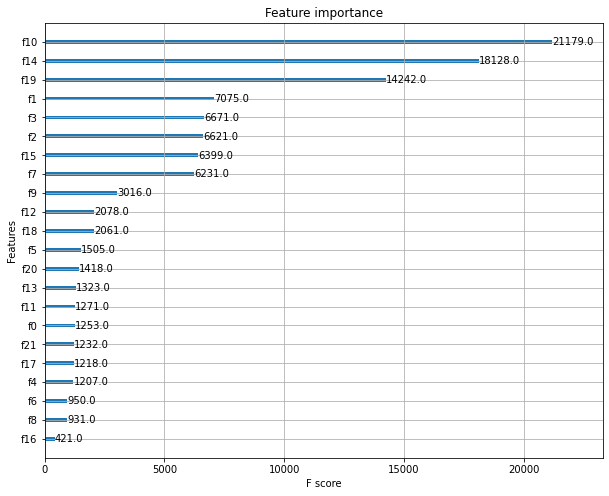

In [18]:
fig, ax = plt.subplots(figsize = (10, 8))
xgb.plot_importance(xgb_clf_tuned, ax=ax)

Prediction and evaluation

In [19]:
# Predict on test set using fitted model
y_pred = xgb_clf_tuned.predict(X_test)

In [21]:
from sklearn import metrics
stats = [metrics.precision_score, metrics.recall_score, metrics.f1_score]
[g(y_test, y_pred) for g in stats]

[0.9721547676865793, 0.9446279691678464, 0.9581937131003669]

In [22]:
# Mean accuracy
accuracy_score(y_test, y_pred)

0.9998525942566897

<AxesSubplot: >

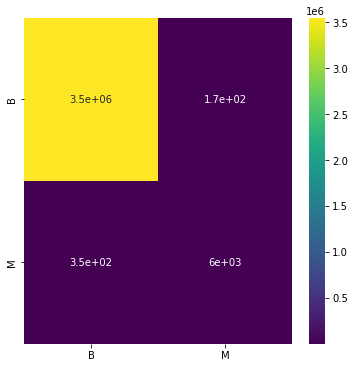

In [23]:
# Confusion matrix
conf = confusion_matrix(y_test, y_pred)
df_conf = pd.DataFrame(conf, index = ['B', 'M'], columns = ['B', 'M'])
plt.figure(figsize = (6, 6))
sns.heatmap(df_conf, annot=True, cmap='viridis')